# Does climate impact the number of COVID cases?


This analysis takes a look at climate factors, including temperature and humidity, for ten cities around the United States.  Additionally, we look at the impact the climate factors have on time outside of the home in comparison to the amount of COVID cases. Does a warmer climate cause a higher new case rate of COVID in these cities? Does higher humidity mean higher percentage of cases? We also analyze the latitude of each city to see if that relates to climate and COVID-cases as well by utilizing Google API.


The cities we are using to analyze include: Boston, Dallas, Denver, Detroit, Honolulu, Los Angeles, Miami, New York City, San Francisco, and Seattle. We selected cities that have no overall bias to location within the United States to get as accurate description of different climates, while also picking similar metropolitan areas. 

# Back End Analysis

In [150]:
#Import Dependencies 
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from sklearn import datasets
import gmaps
import json
import random
from pprint import pprint
from citipy import citipy
import seaborn as sns
import scipy.stats as st



#import api_key - Jess
api_key="e9f34fe30c3508b1804ca865ed96b3b4"


# Configure gmaps
gmaps.configure(api_key=api_key)


#create city list
city_list=[
"Boston",
"Miami",
"Seattle",
"New York City",
"Dallas",
"Denver",
"Los Angeles", 
"San Francisco",
"Detroit",
"Honolulu",
]

In [2]:
#Reference & Read CSV files
csv_path_all="Resources/TempResources/marchseptember.csv"
csv_path_covid="Resources/CSVFiles/completed_covid_cases_data.csv"

city_data=pd.read_csv("Resources/DataFiles/GeoIDs - City.csv")
covid_daily_cases=pd.read_csv("Resources/DataFiles/COVID Cases - City - Daily.csv")
daily_mobility=pd.read_csv("Resources/DataFiles/Google Mobility - City - Daily.csv")

covid_df=pd.read_csv(csv_path_covid, encoding="utf-8")
city_df=pd.read_csv(csv_path_all, encoding="utf-8")



# COVID Cases & GPS Data

The following data was pulled from the Tracktherecovery.com and organized/cleaned by Will.

In [3]:
#Covid Case Information & GPS Information
city_data=city_data.loc[city_data['cityname'].isin(city_list)]
city_data



,cityid,cityname,stateabbrev,statename,statefips,city_pop2019
0,1,Los Angeles,CA,California,6,10039107
1,2,New York City,NY,New York,36,8336817
6,7,Dallas,TX,Texas,48,2635516
8,9,Seattle,WA,Washington,53,2252782
12,13,Detroit,MI,Michigan,26,1749343
20,21,San Francisco,CA,California,6,881549
24,25,Boston,MA,Massachusetts,25,803907
27,28,Denver,CO,Colorado,8,727211
37,38,Miami,FL,Florida,12,2716940
47,48,Honolulu,HI,Hawaii,15,974563


# Merging City Case Data

In [4]:
#merge city data and covid daily cases
merge1=pd.merge(city_data,covid_daily_cases,on="cityid",how="left")
merge1.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate
0,1,Los Angeles,CA,California,6,10039107,2020,1,21,0,0,0.0,.
1,1,Los Angeles,CA,California,6,10039107,2020,1,22,0,0,0.0,.
2,1,Los Angeles,CA,California,6,10039107,2020,1,23,0,0,0.0,.
3,1,Los Angeles,CA,California,6,10039107,2020,1,24,0,0,0.0,.
4,1,Los Angeles,CA,California,6,10039107,2020,1,25,0,0,0.0,.


In [5]:
data_df=pd.merge(merge1,daily_mobility,on=["cityid","month","day","year"],how="inner")
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,0,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,0,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,0,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,0,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,0,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,89,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,114,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,88,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,158,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000


In [6]:
#concatenate
data_df["concat"] = data_df["month"].astype(str) + data_df["day"].astype(str)

In [7]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,...,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625,224
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,...,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020,225
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,...,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620,226
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,...,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620,227
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,...,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,...,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000,97
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,...,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000,98
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,...,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000,99
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,...,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000,910


In [8]:
data_df["concat"] = data_df["concat"].astype(int)

completed_city_data=data_df.loc[(data_df['month'] >= 3)]

completed_city_data=completed_city_data.sort_values(by=['month', 'day'],ascending=False)

completed_city_data=completed_city_data[:-140]

In [9]:
completed_city_data.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,...,2511.0,8.05,-0.2910,-0.1170,-.0557,-0.431,-0.373,0.1200,-0.1420,911
401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,...,2902.0,3.08,-0.2200,-0.0590,.812,-0.379,-0.413,0.1020,-0.1110,911
602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,...,2971.0,12,-0.1570,-0.0886,.234,-0.336,-0.356,0.0843,-0.0959,911
803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,...,920.0,3.97,-0.2500,-0.1060,.711,-0.503,-0.469,0.1360,-0.1490,911
1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,...,1894.0,10.5,-0.0771,-0.0614,.,-0.350,-0.346,0.0614,-0.0638,911


In [10]:
completed_city_data['New Cases Per Million People']=round((completed_city_data['new_case_count']/(completed_city_data['city_pop2019']/1000000)),0)
completed_city_data['Total Cases Per Million People']=round((completed_city_data['case_count']/(completed_city_data['city_pop2019']/1000000)),0)

completed_city_data

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat,New Cases Per Million People,Total Cases Per Million People
200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,...,-0.2910,-0.1170,-.0557,-0.431,-0.37300,0.1200,-0.1420,911,104.0,25108.0
401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,...,-0.2200,-0.0590,.812,-0.379,-0.41300,0.1020,-0.1110,911,30.0,29020.0
602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,...,-0.1570,-0.0886,.234,-0.336,-0.35600,0.0843,-0.0959,911,130.0,29706.0
803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,...,-0.2500,-0.1060,.711,-0.503,-0.46900,0.1360,-0.1490,911,59.0,9197.0
1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,...,-0.0771,-0.0614,.,-0.350,-0.34600,0.0614,-0.0638,911,149.0,18943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,...,-0.2190,0.0829,-.136,-0.343,-0.22900,0.1110,-0.1410,315,7.0,42.0
1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,...,-0.0957,0.1460,.196,-0.193,-0.07860,0.0386,-0.0517,315,5.0,39.0
1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,...,-0.0643,0.2410,.314,-0.160,-0.02290,0.0243,-0.0365,315,7.0,39.0
1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,...,-0.0286,0.1300,-.0729,-0.123,-0.00571,0.0214,-0.0334,315,2.0,5.0


In [11]:
la_df = completed_city_data.loc[(completed_city_data['cityname'] =='Los Angeles')]
nyc_df=completed_city_data.loc[(completed_city_data['cityname'] =='New York City')]
dallas_df=completed_city_data.loc[(completed_city_data['cityname'] =='Dallas')]
seattle_df=completed_city_data.loc[(completed_city_data['cityname'] =='Seattle')]
detroit_df=completed_city_data.loc[(completed_city_data['cityname'] =='Detroit')]
sf_df=completed_city_data.loc[(completed_city_data['cityname'] =='San Francisco')]
boston_df=completed_city_data.loc[(completed_city_data['cityname'] =='Boston')]
denver_df=completed_city_data.loc[(completed_city_data['cityname'] =='Denver')]
miami_df=completed_city_data.loc[(completed_city_data['cityname'] =='Miami')]
honolulu_df=completed_city_data.loc[(completed_city_data['cityname'] =='Honolulu')]
march_df=completed_city_data.loc[(completed_city_data['month'] =='3')]
april_df=completed_city_data.loc[(completed_city_data['month'] =='4')]
may_df=completed_city_data.loc[(completed_city_data['month'] =='5')]
june_df=completed_city_data.loc[(completed_city_data['month'] =='6')]
july_df=completed_city_data.loc[(completed_city_data['month'] =='7')]
august_df=completed_city_data.loc[(completed_city_data['month'] =='8')]
september_df=completed_city_data.loc[(completed_city_data['month'] =='9')]







completed_city_data.dtypes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


cityid                              int64
cityname                           object
stateabbrev                        object
statename                          object
statefips                           int64
city_pop2019                        int64
year                                int64
month                               int64
day                                 int64
case_count                          int64
new_case_count                      int64
case_rate                         float64
new_case_rate                      object
gps_retail_and_recreation         float64
gps_grocery_and_pharmacy          float64
gps_parks                          object
gps_transit_stations              float64
gps_workplaces                    float64
gps_residential                   float64
gps_away_from_home                float64
concat                              int64
New Cases Per Million People      float64
Total Cases Per Million People    float64
dtype: object

In [12]:
weather_averages=pd.read_csv("Resources/CSVFiles/marchseptember.csv")
city_average=completed_city_data.groupby(["cityname","month"]).agg({'gps_away_from_home':'mean'})
city_average=city_average.reset_index()

In [13]:
city_average=city_average.rename(columns={"cityname": "Name", "month": "Period"})
temp_outside_df=pd.merge(weather_averages,city_average, on=["Name","Period"])
temp_outside_df.rename(columns={"gps_parks": "Time Spend not at home vs Baseline"})

,Name,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,gps_away_from_home
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38,-0.161682
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76,-0.236500
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31,-0.167161
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04,-0.123500
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85,-0.130387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73,-0.229871
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05,-0.164167
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30,-0.174065
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98,-0.161613


# Temperature Data

The following data was pulled from Visualcrossing.com and created/cleaned by Jess.

In [14]:
#Clean Dataframes
del city_df["Wind Chill"]
del city_df["Heat Index"]
del city_df["Snow Depth"]
del city_df["Visibility"]

#Rename Headers
city_df=city_df.rename(columns={"Period":"month"})

In [15]:
city_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,8.97,23.0,40.3,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,1.27,27.7,40.3,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,4.77,25.3,43.0,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,5.97,31.1,49.2,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,1.46,23.0,55.3,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,14.60,23.7,33.8,13.9,72.73
66,Miami,6,90.2,74.7,83.4,5.63,15.7,24.2,12.7,75.05
67,Miami,7,96.2,74.9,84.6,10.16,21.8,33.3,16.9,72.30
68,Miami,8,92.0,75.2,85.2,7.38,24.9,35.8,15.9,73.98


In [16]:
#create dataframe grouped by City and Month
month_temp=city_df.groupby(["Name", "month"])
month_temp.head()

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,8.97,23.0,40.3,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,1.27,27.7,40.3,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,4.77,25.3,43.0,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,5.97,31.1,49.2,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,1.46,23.0,55.3,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,14.60,23.7,33.8,13.9,72.73
66,Miami,6,90.2,74.7,83.4,5.63,15.7,24.2,12.7,75.05
67,Miami,7,96.2,74.9,84.6,10.16,21.8,33.3,16.9,72.30
68,Miami,8,92.0,75.2,85.2,7.38,24.9,35.8,15.9,73.98


In [17]:
#find just detroit information and create dataframe
det_df=city_df.loc[city_df["Name"] == "Detroit", :]
det_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
49,Detroit,3,63.6,20.6,40.5,2.79,31.8,52.8,34.1,72.02
50,Detroit,4,70.0,25.8,44.9,1.76,29.6,49.4,31.7,64.55
51,Detroit,5,88.8,30.1,57.3,3.34,23.4,43.6,27.1,65.69
52,Detroit,6,91.5,47.6,71.4,3.90,28.8,47.2,13.5,60.45
53,Detroit,7,93.5,62.8,77.4,4.93,16.7,37.8,14.8,67.06
54,Detroit,8,92.3,57.4,73.2,6.74,19.9,34.4,16.7,68.78
55,Detroit,9,83.7,39.1,63.7,2.55,23.7,40.3,19.9,71.62


In [18]:
#read and clean COVID data
covid_df

,Unnamed: 0,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_away_from_home,New Cases Per Million People,Total Cases Per Million People
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,1042,2511.000,8.0500,-0.1420,104.0,25108.0
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,250,2902.000,3.0800,-0.1110,30.0,29020.0
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,343,2971.000,12.0000,-0.0959,130.0,29706.0
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,133,920.000,3.9700,-0.1490,59.0,9197.0
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,261,1894.000,10.5000,-0.0638,149.0,18943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,6,4.200,0.4210,-0.1410,7.0,42.0
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,4,3.860,0.3910,-0.0517,5.0,39.0
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,5,3.850,0.5110,-0.0365,7.0,39.0
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,5,0.478,0.0684,-0.0334,2.0,5.0


In [19]:
#Clean and Rename Headers
covid_data=covid_df.rename(columns={"cityid":"City ID", "cityname":"Name",
                                    "stateabbrev":"Abbreviation","statename":"State Name",
                                   "city_pop2019": "City Population", "year": "Year",
                                   "new_case_count": "New Case Count", "case_rate": "Case Rate",
                                   "new_case_rate": "New Case Rate", "case_count": "Case Count"})


del covid_data["gps_away_from_home"]







covid_data

,Unnamed: 0,City ID,Name,Abbreviation,State Name,statefips,City Population,Year,month,day,Case Count,New Case Count,Case Rate,New Case Rate,New Cases Per Million People,Total Cases Per Million People
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,1042,2511.000,8.0500,104.0,25108.0
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,250,2902.000,3.0800,30.0,29020.0
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,343,2971.000,12.0000,130.0,29706.0
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,133,920.000,3.9700,59.0,9197.0
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,261,1894.000,10.5000,149.0,18943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,6,4.200,0.4210,7.0,42.0
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,4,3.860,0.3910,5.0,39.0
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,5,3.850,0.5110,7.0,39.0
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,5,0.478,0.0684,2.0,5.0


In [20]:
#Create Grouped dataframe by Month and Sums
month_covid=covid_data.groupby(["Name", "month"])
month_covid.sum()



Unnamed: 0  City ID  statefips  City Population   Year  day  \
Name    month                                                                
Boston  3           20978      425        425         13666419  34340  391   
        4           37725      750        750         24117210  60600  465   
        5           39928      775        775         24921117  62620  496   
        6           39555      750        750         24117210  60600  465   
        7           41819      775        775         24921117  62620  496   
...                   ...      ...        ...              ...    ...  ...   
Seattle 5           21235      279       1643         69836242  62620  496   
        6           21465      270       1590         67583460  60600  465   
        7           23126      279       1643         69836242  62620  496   
        8           24087      279       1643         69836242  62620  496   
        9            8778       99        583         24780602  22220   66   

               Case Count  New Case Count  Case Rate  New Case Rate  \
Name    month                                                         
Boston  3            6639            1346      826.5         98.821   
        4          205735           11517    25591.0       1372.600   
        5          497778            5046    61920.0        727.920   
        6          579350            1883    72065.0        253.500   
        7          634468            1403    78923.0        156.210   
...                   ...             ...        ...            ...   
Seattle 5          228112            1851    10126.0         88.560   
        6          269119            2037    11950.0         81.680   
        7          393928            5018    17487.0        218.600   
        8          546508            4468    24259.0        203.010   
        9          222507            1034     9878.0         48.300   

               New Cases Per Million People  Total Cases Per Million People  
Name    month                                                                
Boston  3                            1676.0                          8258.0  
        4                           14326.0                        255919.0  
        5                            6276.0                        619200.0  
        6                            2344.0                        720666.0  
        7                            1746.0                        789232.0  
...                                     ...                             ...  
Seattle 5                             825.0                        101258.0  
        6                             906.0                        119459.0  
        7                            2228.0                        174861.0  
        8                            1982.0                        242593.0  
        9                             460.0                         98772.0  

[70 rows x 12 columns]

In [21]:
# Converting a GroupBy object into a DataFrame
month_new_case = pd.DataFrame(month_covid["New Cases Per Million People"].sum())

month_new_case.reset_index()

,Name,month,New Cases Per Million People
0,Boston,3,1676.0
1,Boston,4,14326.0
2,Boston,5,6276.0
3,Boston,6,2344.0
4,Boston,7,1746.0
...,...,...,...
65,Seattle,5,825.0
66,Seattle,6,906.0
67,Seattle,7,2228.0
68,Seattle,8,1982.0


In [22]:
#converting temperature data in to a dtaframe
city_month_temp = pd.DataFrame(month_temp["Temperature"].sum())
city_month_temp.reset_index()

,Name,month,Temperature
0,Boston,3,42.8
1,Boston,4,45.9
2,Boston,5,58.0
3,Boston,6,69.5
4,Boston,7,75.5
...,...,...,...
65,Seattle,5,59.0
66,Seattle,6,61.7
67,Seattle,7,66.8
68,Seattle,8,67.8


In [23]:
#write to csvs
city_month_temp.to_csv("Resources/city_month_temp_1.csv", index=True, header=True)
month_new_case.to_csv("Resources/month_new_case_1.csv", index=True, header=True)

csv_path_merge="Resources/TempResources/temp_new_cases_combined.csv"
merge_df=pd.read_csv(csv_path_merge, encoding="utf-8")

merge_df=merge_df.rename(columns={"temperature": "Temperature"})
merge_df

,Name,month,New Cases Per Million People,Temperature
0,Boston,3,1676.0,42.8
1,Boston,4,14326.0,45.9
2,Boston,5,6276.0,58.0
3,Boston,6,2344.0,69.5
4,Boston,7,1746.0,75.5
...,...,...,...,...
65,Seattle,5,825.0,59.0
66,Seattle,6,906.0,61.7
67,Seattle,7,2228.0,66.8
68,Seattle,8,1982.0,67.8


In [24]:
#Creat a dataframe for the monthly Relative Humidity
city_month_humidity = pd.DataFrame(month_temp["Relative Humidity"].sum())
city_month_humidity.reset_index()




,Name,month,Relative Humidity
0,Boston,3,57.33
1,Boston,4,59.53
2,Boston,5,57.51
3,Boston,6,64.90
4,Boston,7,70.02
...,...,...,...
65,Seattle,5,63.60
66,Seattle,6,66.02
67,Seattle,7,60.34
68,Seattle,8,59.93


In [25]:
#Write to CSV
city_month_humidity.to_csv("Resources/TempResources/city_month_humidity_1.csv", index=True, header=True)

csv_path_humidity="Resources/TempResources/humidity_new_cases_combined.csv"
humidity_merge_df=pd.read_csv(csv_path_humidity, encoding="utf-8")



humidity_merge_df

,Name,month,New Cases Per Million People,Relative Humidity
0,Boston,3,1676.0,57.33
1,Boston,4,14326.0,59.53
2,Boston,5,6276.0,57.51
3,Boston,6,2344.0,64.90
4,Boston,7,1746.0,70.02
...,...,...,...,...
65,Seattle,5,825.0,63.60
66,Seattle,6,906.0,66.02
67,Seattle,7,2228.0,60.34
68,Seattle,8,1982.0,59.93


In [26]:
#Create a detroit humidity dataframe
detroit_humidity=humidity_merge_df.loc[merge_df["Name"]=="Detroit",:]

detroit_humidity

,Name,month,New Cases Per Million People,Relative Humidity
21,Detroit,3,2130.0,72.02
22,Detroit,4,7440.0,64.55
23,Detroit,5,2112.0,65.69
24,Detroit,6,1345.0,60.45
25,Detroit,7,2461.0,67.06
26,Detroit,8,2383.0,68.78
27,Detroit,9,1076.0,71.62


In [27]:
#Create a dataframe for Detroit Data
detroit_merge=merge_df.loc[merge_df["Name"]=="Detroit",:]
detroit_merge

,Name,month,New Cases Per Million People,Temperature
21,Detroit,3,2130.0,40.5
22,Detroit,4,7440.0,44.9
23,Detroit,5,2112.0,57.3
24,Detroit,6,1345.0,71.4
25,Detroit,7,2461.0,77.4
26,Detroit,8,2383.0,73.2
27,Detroit,9,1076.0,63.7


# Cities API Pull - Latitudes

The data below is pulled from a Google API to find the Latitude of the respective 10 cities.

In [127]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key="e9f34fe30c3508b1804ca865ed96b3b4"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="



In [134]:
cities = ["Boston", "Dallas", "Denver", "Detroit", "Honolulu", "Los Angeles", "Miami", "New York City", "San Francisco", "Seattle"]

# set up lists to hold reponse info
lat = []
lng = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])


print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lng}")


The latitude information received is: [42.36, 32.77, 39.74, 42.33, 21.31, 34.05, 25.77, 40.71, 37.77, 47.61]
The longitude information received is: [-71.06, -96.78, -104.98, -83.05, -157.86, -118.24, -80.19, -74.01, -122.42, -122.33]


In [135]:
# create a data frame from cities and lat
lat_dict = {
    "city": cities,
    "lat": lat,
    'lng': lng,
}
lat_data = pd.DataFrame(lat_dict)

lat_data=lat_data.rename(columns={"city":"Name"})

lat_data

,Name,lat,lng
0,Boston,42.36,-71.06
1,Dallas,32.77,-96.78
2,Denver,39.74,-104.98
3,Detroit,42.33,-83.05
4,Honolulu,21.31,-157.86
5,Los Angeles,34.05,-118.24
6,Miami,25.77,-80.19
7,New York City,40.71,-74.01
8,San Francisco,37.77,-122.42
9,Seattle,47.61,-122.33


In [31]:
month_sums=month_new_case.groupby("Name").sum()
month_sums.reset_index()

,Name,New Cases Per Million People
0,Boston,28620.0
1,Dallas,29703.0
2,Denver,16044.0
3,Detroit,18947.0
4,Honolulu,9741.0
5,Los Angeles,25106.0
6,Miami,60125.0
7,New York City,28990.0
8,San Francisco,11528.0
9,Seattle,9030.0


In [142]:
# Merge two dataframes using an outer join
lat_merge_df = pd.merge(lat_data, month_sums, on="Name", how="outer")
lat_merge_df

latlng_merge_df=pd.merge(lat_merge_df, lat_data, on="Name", how="inner")
del latlng_merge_df["lat_y"]
del latlng_merge_df["lng_y"]

latlng_merge_df=latlng_merge_df.rename(columns={"lat_x": "Latitude", "lng_x": "Longitude"})



latlng_merge_df

,Name,Latitude,Longitude,New Cases Per Million People
0,Boston,42.36,-71.06,28620.0
1,Dallas,32.77,-96.78,29703.0
2,Denver,39.74,-104.98,16044.0
3,Detroit,42.33,-83.05,18947.0
4,Honolulu,21.31,-157.86,9741.0
5,Los Angeles,34.05,-118.24,25106.0
6,Miami,25.77,-80.19,60125.0
7,New York City,40.71,-74.01,28990.0
8,San Francisco,37.77,-122.42,11528.0
9,Seattle,47.61,-122.33,9030.0


# Create a Heat Map of Cases and Location

In [145]:
# Store latitude and longitude in locations
locations = latlng_merge_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
millioncases = latlng_merge_df["New Cases Per Million People"].astype(float)

In [152]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=millioncases, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Visualizing the Data

Below you will find a series of 9 scatterplots that find any potential correlation between the following:

1. Average Temperature (F) vs. New Case Count (Monthly) - All Cities
2. Average Temperature (F) vs. New Case Count (Monthly) - Detroit
3. Relative Humidity (%) vs. New Case Count (Monthly) - All Cities
4. Relative Humidity (%) vs. New Case Count (Monthly) - Detroit
5. Avg Time spent away from Home(vs the baseline) vs New Covid Case Count
6. Detroit Time spent away from home(vs the baseline) vs New Covid Cases
7. Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature
8. Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature
9. Latitude vs. Total New Cases (March - September)



The r-value is: 0.017165274464042767
y = 50.21x + 8.32


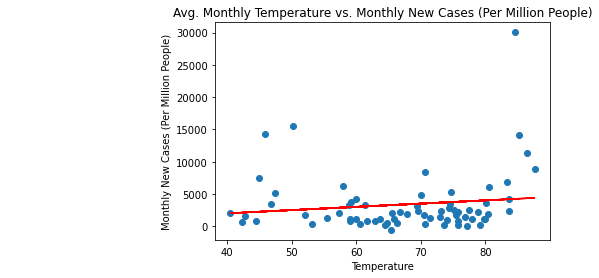

In [33]:
# Add the linear regression equation and line to plot
x_values = merge_df['Temperature']
y_values = merge_df['New Cases Per Million People']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases (Per Million People)")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases (Per Million People)')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.23121468284730143
y = -72.36x + 7135.37


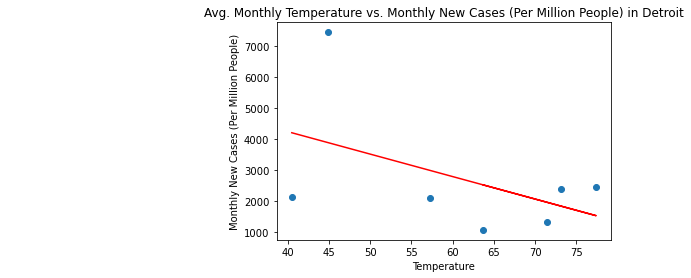

In [34]:
# Add the linear regression equation and line to plot
x_values = detroit_merge['Temperature']
y_values = detroit_merge['New Cases Per Million People']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases (Per Million People) in Detroit")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases (Per Million People)')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

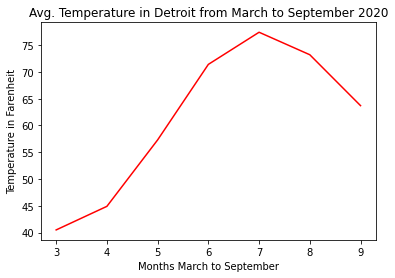

In [58]:
#The below scatterplot is showing the line chart of temperature in Detroit from March - September
time=[3,4,5,6,7,8,9]
temperature_line_data=detroit_merge['Temperature']
covid_line_data=detroit_merge["New Cases Per Million People"]
temperature_line = plt.plot(time, temperature_line_data, color="red")
plt.title("Avg. Temperature in Detroit from March to September 2020")
plt.xlabel("Months March to September")
plt.ylabel("Temperature in Farenheit")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

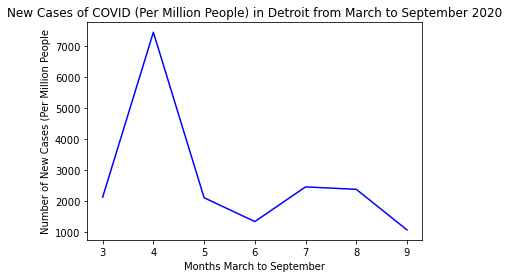

In [60]:
#The below scatterplot is showing the line chart of new cases (per million people) in Detroit from March - September


time=[3,4,5,6,7,8,9]
temperature_line_data=detroit_merge['Temperature']
covid_line_data=detroit_merge["New Cases Per Million People"]
covid_line = plt.plot(time, covid_line_data, color="blue")
plt.title("New Cases of COVID (Per Million People) in Detroit from March to September 2020")
plt.xlabel("Months March to September")
plt.ylabel("Number of New Cases (Per Million People")
plt.show


The r-value is: 0.021375799684619935
y = 33.26x + 1519.46


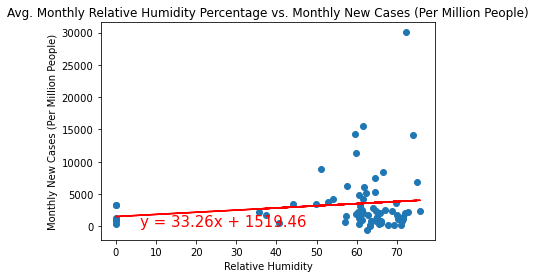

In [35]:
# Add the linear regression equation and line to plot
x_values = humidity_merge_df['Relative Humidity']
y_values = humidity_merge_df['New Cases Per Million People']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Relative Humidity Percentage vs. Monthly New Cases (Per Million People)")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases (Per Million People)')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.06001051467345702
y = -129.0x + 11371.17


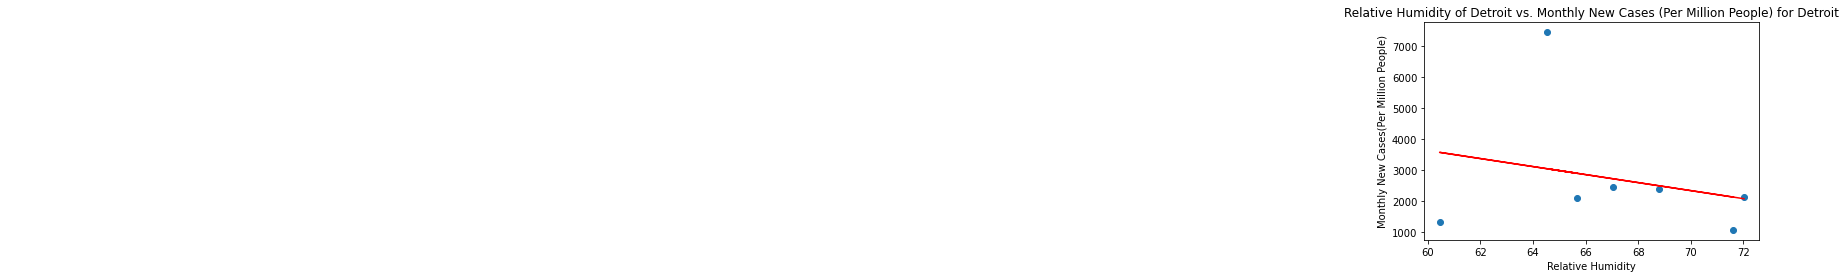

In [36]:
# Add the linear regression equation and line to plot
x_values = detroit_humidity['Relative Humidity']
y_values = detroit_humidity['New Cases Per Million People']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Relative Humidity of Detroit vs. Monthly New Cases (Per Million People) for Detroit")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases(Per Million People)')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

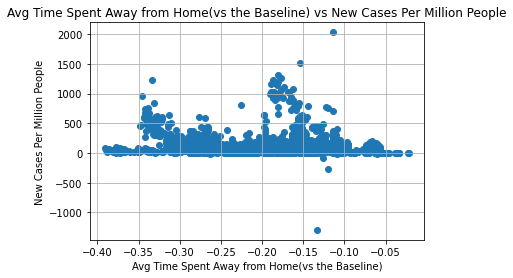

In [37]:

plt.scatter(completed_city_data['gps_away_from_home'],completed_city_data['New Cases Per Million People'])
plt.title("Avg Time Spent Away from Home(vs the Baseline) vs New Cases Per Million People")
plt.ylabel("New Cases Per Million People")
plt.xlabel("Avg Time Spent Away from Home(vs the Baseline)")
plt.grid(True)



The corrleation coefficient is -0.61 meaning there is a moderate negative correlation.
The Linear Regress model for this is y=-749.93x + 3.74


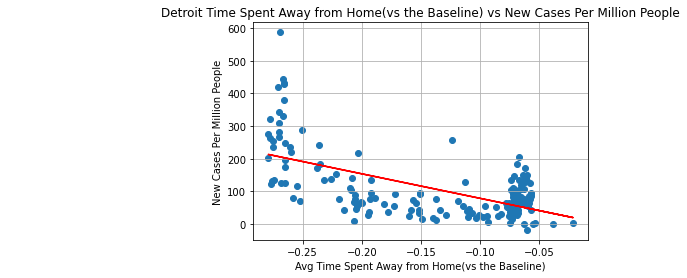

In [38]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit_df['gps_away_from_home'],detroit_df['New Cases Per Million People'])

regress_values = slope*detroit_df['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit_df['gps_away_from_home'],detroit_df['New Cases Per Million People'])
plt.title("Detroit Time Spent Away from Home(vs the Baseline) vs New Cases Per Million People")
plt.ylabel("New Cases Per Million People")
plt.grid(True)
plt.xlabel("Avg Time Spent Away from Home(vs the Baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit_df['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a moderate negative correlation.')
print(f'The Linear Regress model for this is {line_eq}')

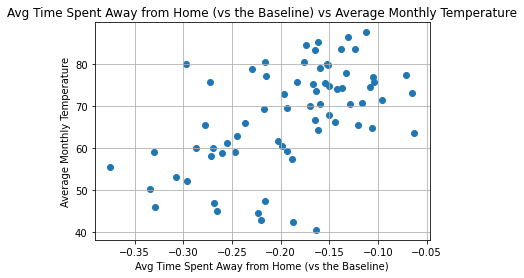

In [39]:
plt.scatter(temp_outside_df['gps_away_from_home'],temp_outside_df['Temperature'])
plt.title("Avg Time Spent Away from Home (vs the Baseline) vs Average Monthly Temperature")
plt.ylabel("Average Monthly Temperature")
plt.xlabel("Avg Time Spent Away from Home (vs the Baseline)")
plt.grid(True)




The corrleation coefficient is 0.81 meaning there is a strong positive correlation.
The Linear Regress model for this is y=148.02x + 80.48


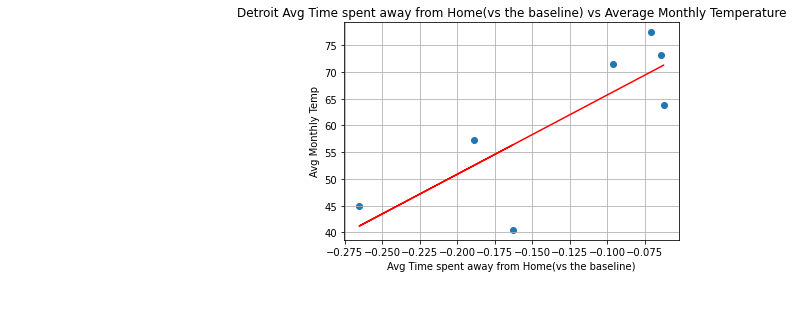

In [40]:

detroit=temp_outside_df.loc[(temp_outside_df['Name'] =='Detroit')]


(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit['gps_away_from_home'],detroit['Temperature'])

regress_values = slope*detroit['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit['gps_away_from_home'],detroit['Temperature'])
plt.title("Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Avg Monthly Temp")
plt.grid(True)
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a strong positive correlation.')
print(f'The Linear Regress model for this is {line_eq}')

# Looking for Outliers in Data

In [96]:
# If the data is in a dataframe, we use pandas to give quartile calculations
cases=month_new_case["New Cases Per Million People"]
quartiles = cases.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"Find below the outlier test for monthly new cases (per million people)")



print(f"The lower quartile of New Cases is: {lowerq}")
print(f"The upper quartile of New Cases is: {upperq}")
print(f"The interquartile range of New Cases is: {iqr}")
print(f"The the median of New Cases is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Find below the outlier test for monthly new cases (per million people)
The lower quartile of New Cases is: 1039.25
The upper quartile of New Cases is: 3613.75
The interquartile range of New Cases is: 2574.5
The the median of New Cases is: 1996.0 
Values below -2822.5 could be outliers.
Values above 7475.5 could be outliers.


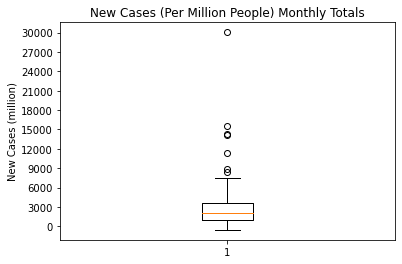

In [103]:
fig1, ax1 = plt.subplots()
ax1.set_title('New Cases (Per Million People) Monthly Totals')
ax1.set_ylabel('New Cases (million)')
ax1.boxplot(cases)
ax1.set_yticks(np.arange(0, 32000, 3000))

plt.show()

In [94]:
# If the data is in a dataframe, we use pandas to give quartile calculations
detroitcases=detroit_merge["New Cases Per Million People"]
quartiles = detroitcases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Find below the outlier test for monthly new cases (per million people) for Detroit")



print(f"The lower quartile of New Cases is: {lowerq}")
print(f"The upper quartile of New Cases is: {upperq}")
print(f"The interquartile range of New Cases is: {iqr}")
print(f"The the median of New Cases is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Find below the outlier test for monthly new cases (per million people) for Detroit
The lower quartile of New Cases is: 1728.5
The upper quartile of New Cases is: 2422.0
The interquartile range of New Cases is: 693.5
The the median of New Cases is: 2130.0 
Values below 688.25 could be outliers.
Values above 3462.25 could be outliers.


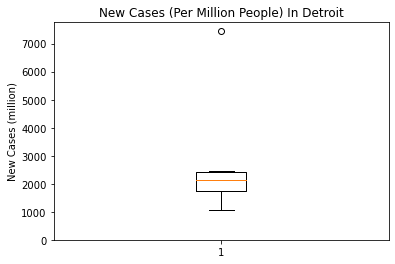

In [92]:
fig1, ax1 = plt.subplots()
ax1.set_title('New Cases (Per Million People) In Detroit')
ax1.set_ylabel('New Cases (million)')
ax1.boxplot(newcases)
ax1.set_yticks(np.arange(0, 8000, 1000))

plt.show()

In [76]:
# If the data is in a dataframe, we use pandas to give quartile calculations
newcases=detroit_merge["Temperature"]
quartiles = newcases.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Temperature is: {lowerq}")
print(f"The upper quartile of Temperature is: {upperq}")
print(f"The interquartile range of Temperature is: {iqr}")
print(f"The the median of Temperature is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Temperature is: 51.1
The upper quartile of Temperature is: 72.3
The interquartile range of Temperature is: 21.2
The the median of Temperature is: 63.7 
Values below 19.3 could be outliers.
Values above 104.1 could be outliers.


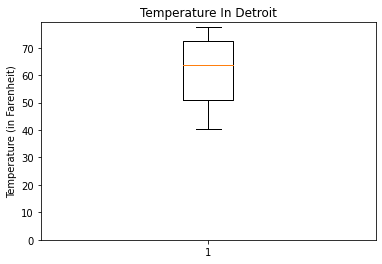

In [77]:
fig1, ax1 = plt.subplots()
ax1.set_title('Temperature In Detroit')
ax1.set_ylabel('Temperature (in Farenheit)')
ax1.boxplot(newcases)
ax1.set_yticks(np.arange(0, 80, 10))

plt.show()

The r-value is: 0.12237194507023588
y = -654.55x + 47636.43


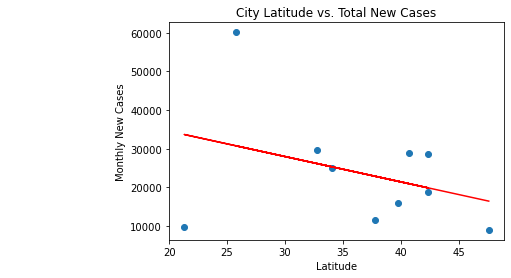

In [153]:
# Add the linear regression equation and line to plot
x_values = lat_merge_df['lat']
y_values = lat_merge_df['New Cases Per Million People']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Total New Cases")
plt.xlabel('Latitude')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

# Final Analysis & Limitations



1. Individual City/State Reaction to COVID
A. Did the cities in our study put Stay at Home Orders in place? If so, when did the initial order start and how long did it last?
B. Outside of Stay at Home Orders, were restrictions on public places put in place? How strict were the guidelines for people being allowed to leave their homes?
        
2. Sample Size and Profile
A. Did 10 cities accurately reflect the country?
B. Could we have found better data sources to pull both the historical weather, COVID tracker, and GPS data from?
    
3. Weather Standards
A. What is considered normal weather for the selected cities? Are we able to see outliers in weather patterns that may had led to an increase/decrease in cases or time spent outside the home?
    
4. Time-Series Data
A.What other factors occurring during the same time could have led to our conclusions?

5. Timing
A.Will had a poorly timed vacation and could not put as much time/effort into the project. 

Based on our research, we can conclude that there is no strong correlation between the ten cities' weather (temperature/relative humidity) and increases with new COVID cases.  In regards to time spent outside, we did find a positive correlation between increased temperatures and time spent away from the home. However, as the populations spent more time away from home, the COVID new cases did not increase. 